# Project Title : Titanic dataset
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
## Sex which can have values Male or Female
## Embarked which can have value Q or S or C

## Ordinal :
## Pclass,Cabin


## DISCRETE: 
## Parch which can have value 0 or 1
## SibSp which can have value 0 or 1
## Survived which can have value 0 or 1
## Continuous : Age,Fare


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier


In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
df=pd.read_csv("titanic.csv")


In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.isnull().sum() #count the number of null values for each feature 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.describe() #describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.info() #dataframe.info() function is used to get a concise summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

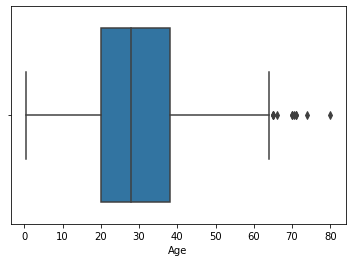

In [15]:
sns.boxplot(df['Age']) #Boxplot is a type of chart that depicts a group of numerical data through their quartiles.

# Removing outlier using IQR

In [16]:
q1=df['Age'].quantile(0.25)


In [17]:
q1

20.125

In [18]:
q3=df['Age'].quantile(0.75)

In [19]:
q3

38.0

In [20]:
IQR=q3-q1

In [21]:
lower=q1-1.5*IQR

In [22]:
upper=q3+1.5*IQR

In [23]:
df=df[(df['Age']>lower) & (df['Age']<upper)]

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

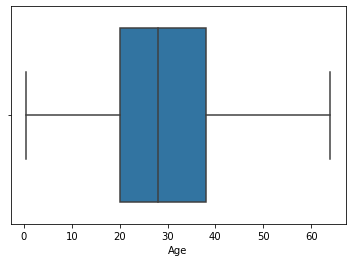

In [25]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

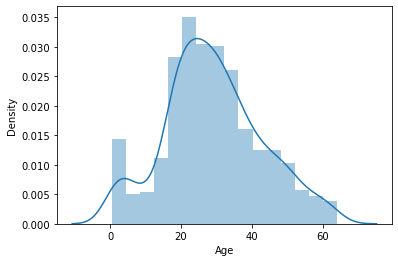

In [26]:
sns.distplot(df['Age'])

In [27]:
mod_val=df['Embarked'].mode()[0] #finding mode for categorical columns

# Replacing null values with mode for categorial feature Embarked

In [28]:
df['Embarked'].fillna(mod_val,inplace=True) #replacing NULL values with mode value

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\3711513034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'].fillna(mod_val,inplace=True) #replacing NULL values with mode value


In [29]:
df.drop('Cabin',axis=1,inplace=True) #most of the values are null in cabin feature so drop cabin feature 

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\1977847986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Cabin',axis=1,inplace=True) #most of the values are null in cabin feature so drop cabin feature


In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

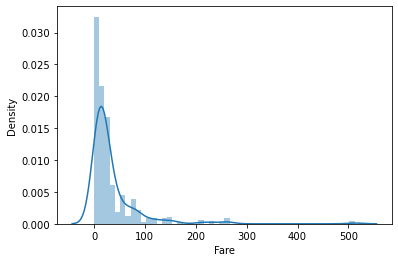

In [31]:
sns.distplot(df['Fare'])

# Transformation applied on Fare feature

In [32]:
df['Fare_log']=np.log(df['Fare'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\2237299401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_log']=np.log(df['Fare'])


In [33]:
df['Fare_log'].min()

-inf

In [34]:
df=df[df['Fare_log']>0]


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

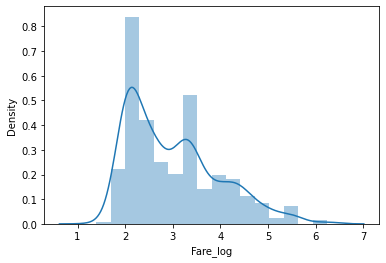

In [35]:
sns.distplot(df['Fare_log'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_log'>

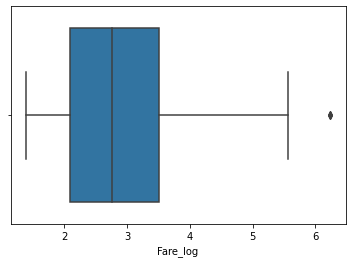

In [36]:
sns.boxplot(df['Fare_log'])

In [37]:
df.columns #display all columns or features 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_log'],
      dtype='object')

In [38]:
df.drop(['PassengerId', 'Name','Ticket','Fare'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\1527660013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['PassengerId', 'Name','Ticket','Fare'],axis=1,inplace=True)


In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

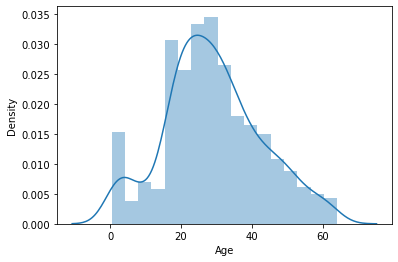

In [40]:
sns.distplot(df['Age'])

In [41]:
df['Age'].mean()

29.011020114942525

In [42]:
age_mean=df['Age'].mean()

# Replacing nan value of age feature with mean value

In [43]:
df['Age'].fillna(age_mean,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\634898034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(age_mean,inplace=True)


In [44]:
df['Age'].isnull().sum()

0

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

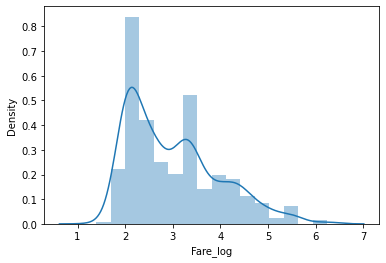

In [46]:
sns.distplot(df['Fare_log'])

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


In [48]:
df_Survived=df.groupby('Survived')

In [49]:
df_Survived['Pclass'].value_counts()

Survived  Pclass
0         3         264
          2          88
          1          56
1         1         121
          3          84
          2          83
Name: Pclass, dtype: int64

## From the above analysis it is clear that 
1. From Pclass 3, 264 number of passengers had not survived which is maximum 
2. From Pclass 1, 56 number of passengers had not survived which is minimum 
3. From Pclass 1, 121 number of passengers had survived which is maximum
4. From Pclass 2, 83 number of passengers had survived which is minimum

<AxesSubplot:xlabel='SibSp', ylabel='count'>

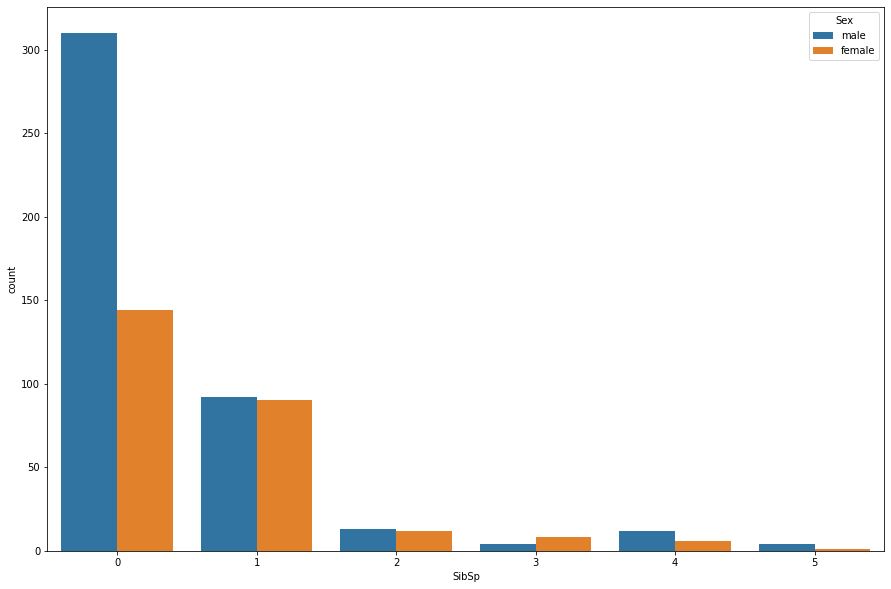

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x='SibSp',data=df,hue='Sex') #number of siblings and spouse 

In [51]:
pd.crosstab(df.SibSp,df.Sex,margins=True)

Sex,female,male,All
SibSp,,,
0,144,310,454
1,90,92,182
2,12,13,25
3,8,4,12
4,6,12,18
5,1,4,5
All,261,435,696


## From the above analysis it is clear that 
1. 454 passengers travelling without sibling and spouse 
2. 5 passengers travelling with 4 siblings and 1 spouse 

In [52]:
df_SibSp=df.groupby('SibSp')


In [53]:
df_SibSp['Sex'].value_counts()

SibSp  Sex   
0      male      310
       female    144
1      male       92
       female     90
2      male       13
       female     12
3      female      8
       male        4
4      male       12
       female      6
5      male        4
       female      1
Name: Sex, dtype: int64

# From the above analysis it is clear that 
1. 310 male passenger and 144 female passengers have no sibling and spouse 
2. 4 male passenger and 1 female passengers have 4 sibling and 1 spouse


<AxesSubplot:xlabel='SibSp', ylabel='count'>

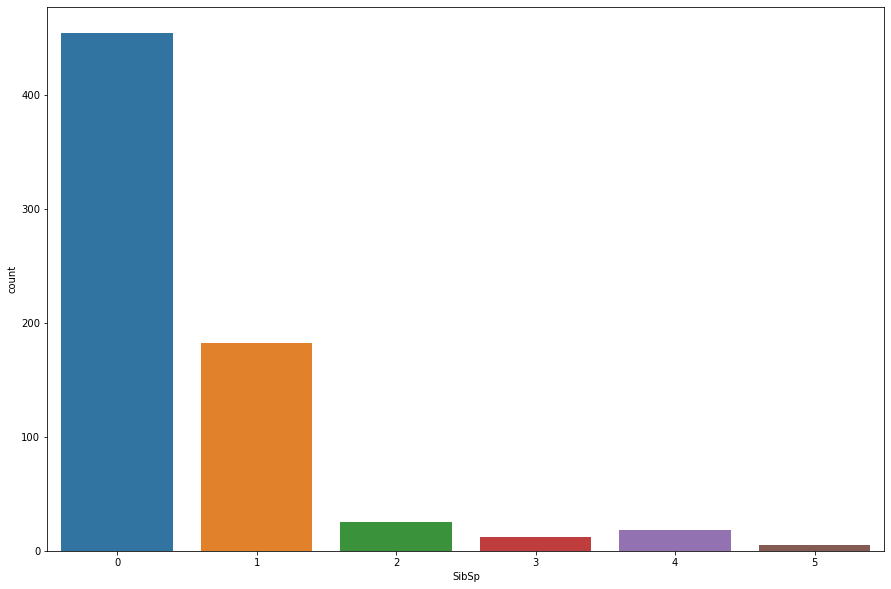

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(x='SibSp',data=df) #number of siblings and spouse 

In [55]:
SibSp_df=df.groupby('SibSp')


In [56]:
SibSp_df.size()

SibSp
0    454
1    182
2     25
3     12
4     18
5      5
dtype: int64

# Observations:

1. passengers with no SibSp are 454
2. passengers with 1 SibSp are 182
3. passengers with 2 SibSp are 25
4. passengers with 3 SibSp are 12
5. passengers with 4 SibSp are 18
6. passengers with 5 Parch are 5



<AxesSubplot:xlabel='SibSp', ylabel='count'>

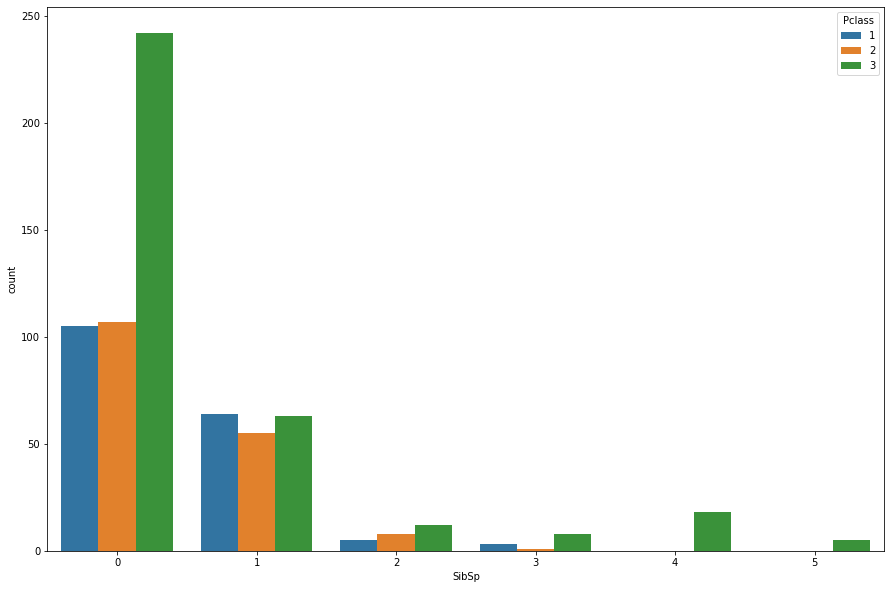

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(x='SibSp',data=df,hue='Pclass') #number of siblings and spouse 

In [58]:
pd.crosstab(df.SibSp,df.Pclass,margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,105,107,242,454
1,64,55,63,182
2,5,8,12,25
3,3,1,8,12
4,0,0,18,18
5,0,0,5,5
All,177,171,348,696


## From the above analysis it is clear that 
1. 454 passengers were travelling with 0 SibSp which is maximum 
2. 5 passengers from Pclass 3 were travelling with 5 SibSp which is minimum
3. 177 passengers were travelling in Pclass 1 
4. 171 passengers were travelling in Pclass 2
5. 348 passengers were travelling in Pclass 3
6. Total passengers travelling is 696

In [59]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


In [60]:
df_SibSp=df.groupby('SibSp')


In [61]:
df_SibSp['Pclass'].value_counts()

SibSp  Pclass
0      3         242
       2         107
       1         105
1      1          64
       3          63
       2          55
2      3          12
       2           8
       1           5
3      3           8
       1           3
       2           1
4      3          18
5      3           5
Name: Pclass, dtype: int64

## From the above analysis it is clear that 
1. 242 passengers from Pclass3,107 passengers from Pclass2 and 105 passengers from Pclass1 were travelling with 0 SibSp which is maximum 
2. 5 passengers from Pclass 3 were travelling with 5 SibSp which is minimum

<AxesSubplot:xlabel='Parch', ylabel='count'>

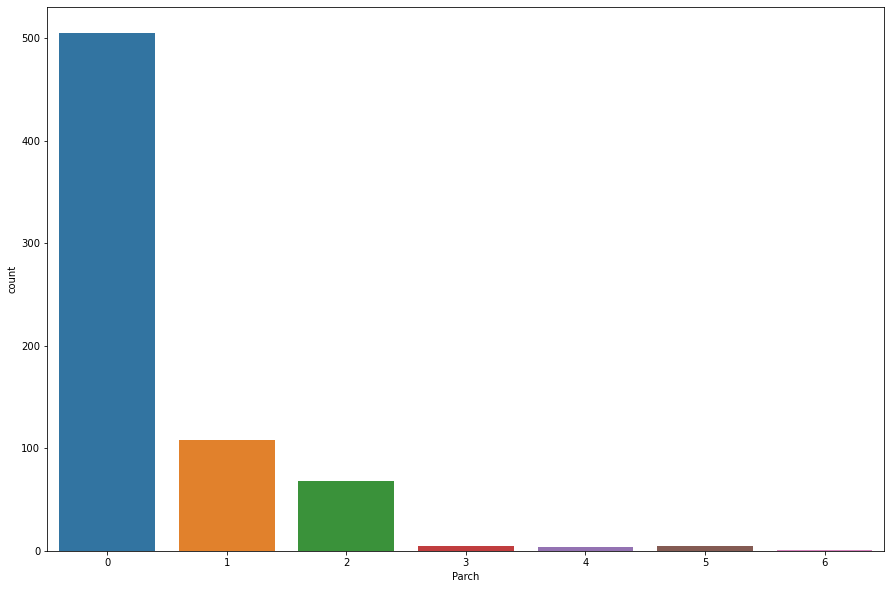

In [62]:
plt.figure(figsize=(15,10))

sns.countplot(x='Parch',data=df) #number of parent and children  

In [63]:
parch_df=df.groupby('Parch')


In [64]:
parch_df.size()

Parch
0    505
1    108
2     68
3      5
4      4
5      5
6      1
dtype: int64

# Observations:

1. passengers with no Parch are 505
2. passengers with 1 Parch are 108
3. passengers with 2 Parch are 68
4. passengers with 3 Parch are 5
5. passengers with 4 Parch are 4
6. passengers with 5 Parch are 5
7. passenger with 6 Parch is 1



<AxesSubplot:xlabel='Parch', ylabel='count'>

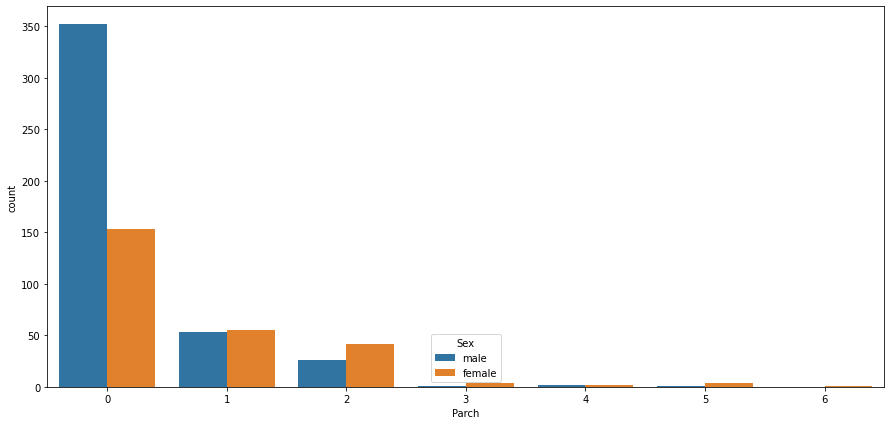

In [65]:
plt.figure(figsize=(15,7))

sns.countplot(x='Parch',data=df,hue='Sex') #number of siblings or spouse 

In [66]:
pd.crosstab(index=df['Parch'],columns=df['Sex'],margins=True)

Sex,female,male,All
Parch,,,
0,153,352,505
1,55,53,108
2,42,26,68
3,4,1,5
4,2,2,4
5,4,1,5
6,1,0,1
All,261,435,696


In [67]:
sex_df=df.groupby('Sex')


In [68]:
sex_df['Parch'].value_counts()

Sex     Parch
female  0        153
        1         55
        2         42
        3          4
        5          4
        4          2
        6          1
male    0        352
        1         53
        2         26
        4          2
        3          1
        5          1
Name: Parch, dtype: int64

# Observations:
1. Male Passengers with 0 Parch are 352
2. Female Passengers with 0 Parch are 153
3. Male Passengers with 5 Parch is 1
4. Female Passengers with 6 Parch is 1
5. Total male passengers : 435
6. Total female passengers : 261

<AxesSubplot:xlabel='Parch', ylabel='count'>

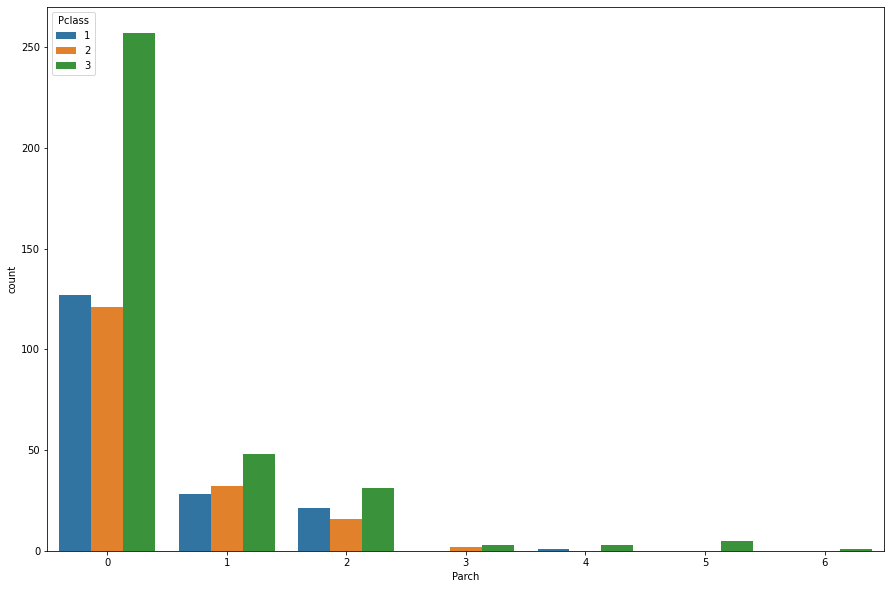

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(x='Parch',data=df,hue='Pclass') #number of siblings or spouse 

In [70]:
pd.crosstab(index=df['Parch'],columns=df['Pclass'],margins=True)

Pclass,1,2,3,All
Parch,,,,
0,127,121,257,505
1,28,32,48,108
2,21,16,31,68
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,177,171,348,696


# Observations:

1. 505 passengers were travelling without parent and child which is maximum 
2. Only 1 passenger were travelling with 1 parent and 5 childrens which is minimum 
3. Total passengers travelling were 696


In [71]:
pclass_df=df.groupby('Pclass')


In [72]:
pclass_df['Parch'].value_counts()

Pclass  Parch
1       0        127
        1         28
        2         21
        4          1
2       0        121
        1         32
        2         16
        3          2
3       0        257
        1         48
        2         31
        5          5
        3          3
        4          3
        6          1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

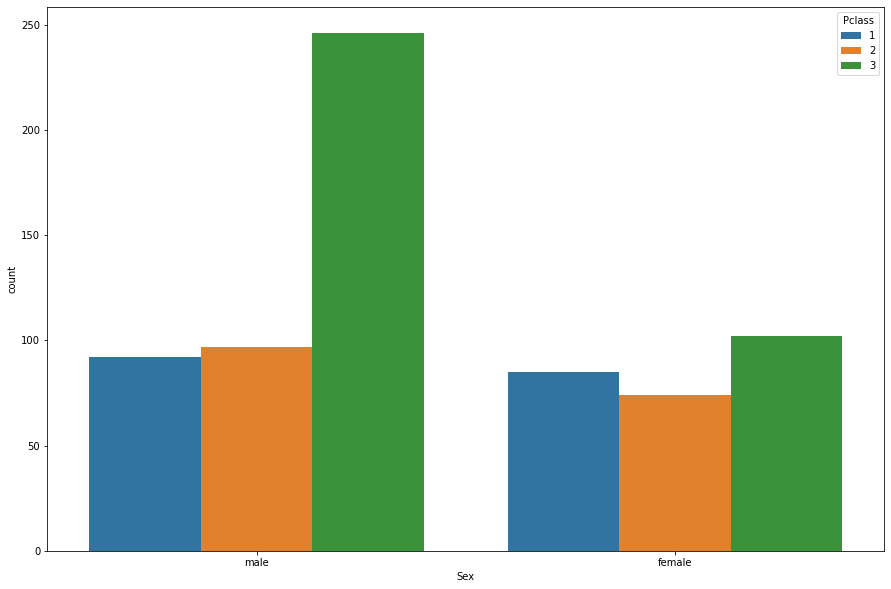

In [73]:
plt.figure(figsize=(15,10))
sns.countplot(x='Sex',data=df,hue='Pclass')

In [74]:
pd.crosstab(index=df['Sex'],columns=df['Pclass'],margins=True) #row wise and column wise sum

Pclass,1,2,3,All
Sex,,,,
female,85,74,102,261
male,92,97,246,435
All,177,171,348,696


# From the above analysis it is clear that 
1. Pclass 1, 92 passengers were male and 85 passengers were female 
2. Pclass 2, 97 passengers were male and 74 passengers were female 
3. Pclass 3, 246 passengers were male and 102 passengers were female 
4. Total female count : 261 and male count : 435 
4. Highest number of males and females were travelling from Pclass 3

In [75]:
pclass_df=df.groupby('Pclass')


In [76]:
sex_df=pclass_df['Sex'].value_counts()


In [77]:
sex_df

Pclass  Sex   
1       male       92
        female     85
2       male       97
        female     74
3       male      246
        female    102
Name: Sex, dtype: int64

# From the above analysis it is clear that 
1. Pclass 1, 92 passengers were male and 85 passengers were female 
2. Pclass 2, 97 passengers were male and 74 passengers were female 
3. Pclass 3, 246 passengers were male and 102 passengers were female 
4. Total female count : 261 and male count : 435 
4. Highest number of males and females were travelling from Pclass 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

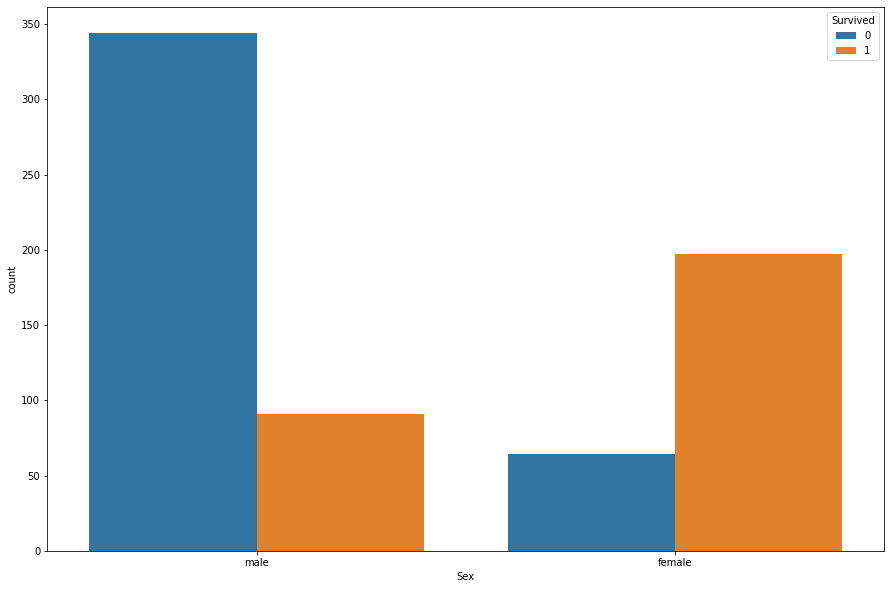

In [78]:
plt.figure(figsize=(15,10))

sns.countplot(x='Sex',hue='Survived',data=df)

In [79]:
pd.crosstab(index=df['Sex'],columns=df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,64,197,261
male,344,91,435
All,408,288,696


In [80]:
sex_df=df.groupby('Sex')


In [81]:
sex_df['Survived'].value_counts()

Sex     Survived
female  1           197
        0            64
male    0           344
        1            91
Name: Survived, dtype: int64

# From the above analysis it is clear that 
1. 91 male passengers and 197 female passengers have survived 
2. 344 male passengers and 64 female passengers have not survived 
## More number of females have survived compare to male passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

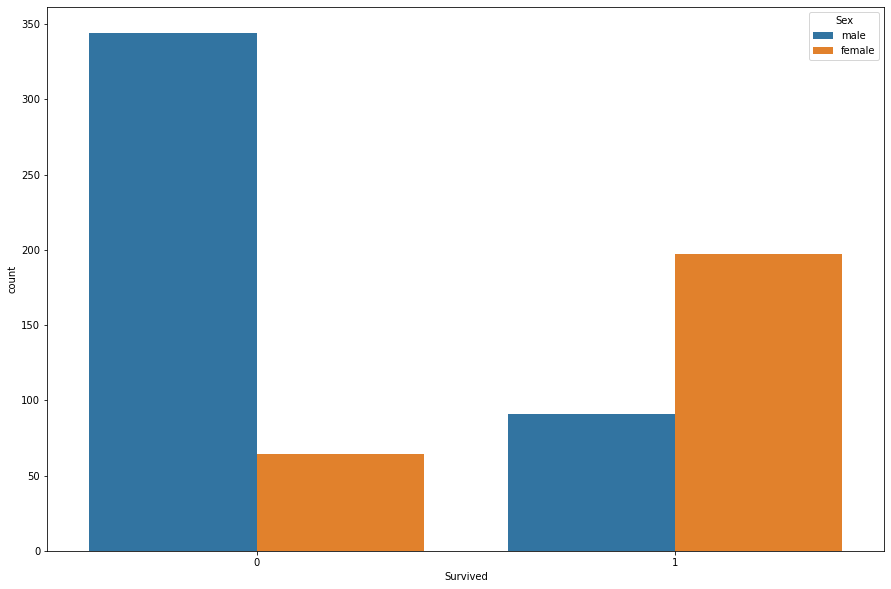

In [82]:
plt.figure(figsize=(15,10))
sns.countplot(x='Survived',data=df,hue='Sex')

In [83]:
pd.crosstab(index=df['Sex'],columns=df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,64,197,261
male,344,91,435
All,408,288,696


# From the above analysis it is clear that 
1. 91 male passengers and 197 female passengers have survived 
2. 344 male passengers and 64 female passengers have not survived 
## More number of females have survived compare to male passengers

In [84]:
df_sex=df.groupby('Survived')


In [85]:
df_sex['Sex'].value_counts()

Survived  Sex   
0         male      344
          female     64
1         female    197
          male       91
Name: Sex, dtype: int64

# From the above analysis it is clear that 
1. 91 male passengers and 197 female passengers have survived 
2. 344 male passengers and 64 female passengers have not survived 
## More number of females have survived compare to male passengers

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

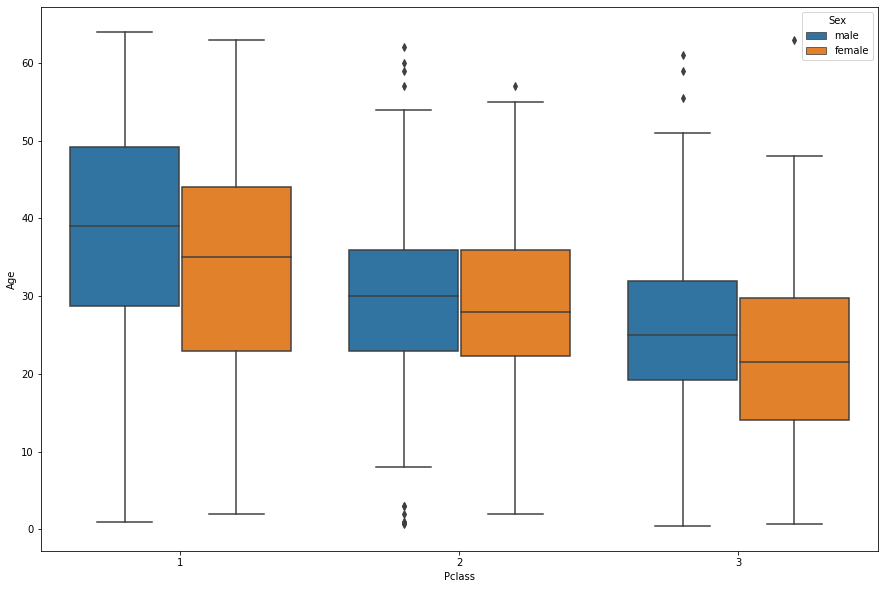

In [86]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=df,hue='Sex')

In [87]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


# From the above analysis it is clear that 
1. Passengers from Pclass 1 have max age of 29.69 years 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

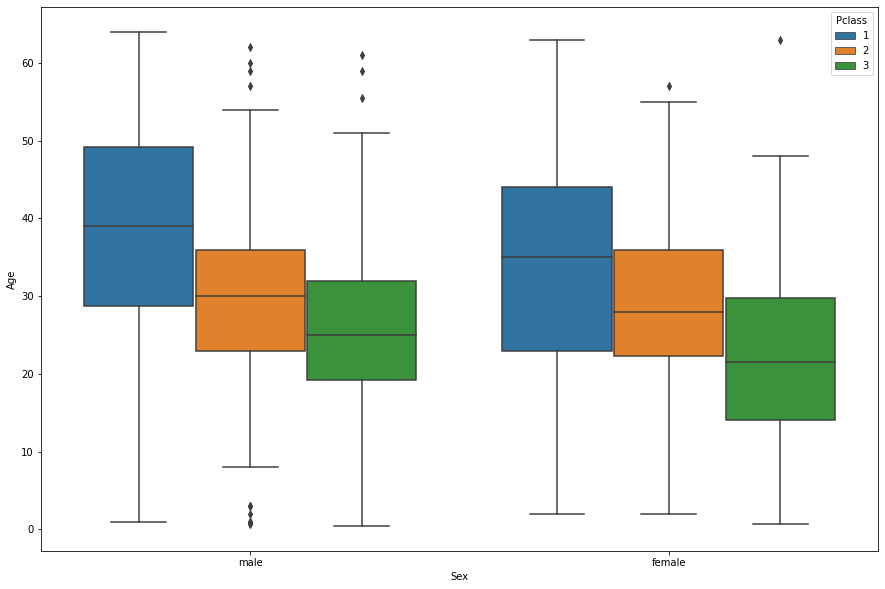

In [88]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Age',data=df,hue='Pclass')

# Observation:
1. Avg age of male and female passengers from Pclass 1 is maximum as comapred to other male passengers in Pclass 2 and Pclass 3
2. Avg age of male and female passengers from Pclass 3 is minimum as comapred to other male passengers in Pclass 1 and Pclass 2

<AxesSubplot:xlabel='Survived', ylabel='Age'>

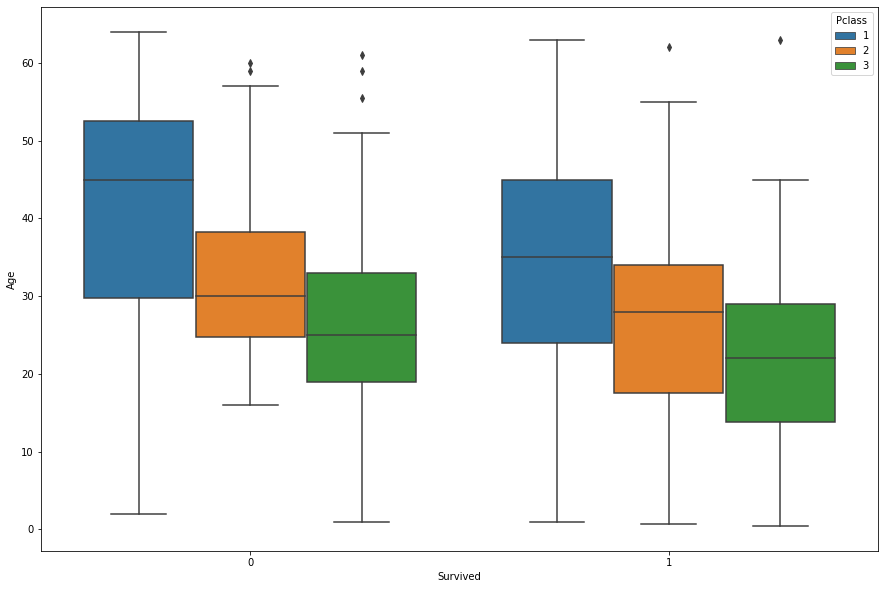

In [89]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Survived',y='Age',data=df,hue='Pclass')

# Observation:
1. Avg age of passengers who have not survived is more as compared to avg age of passengers who survived  

<AxesSubplot:xlabel='Embarked', ylabel='count'>

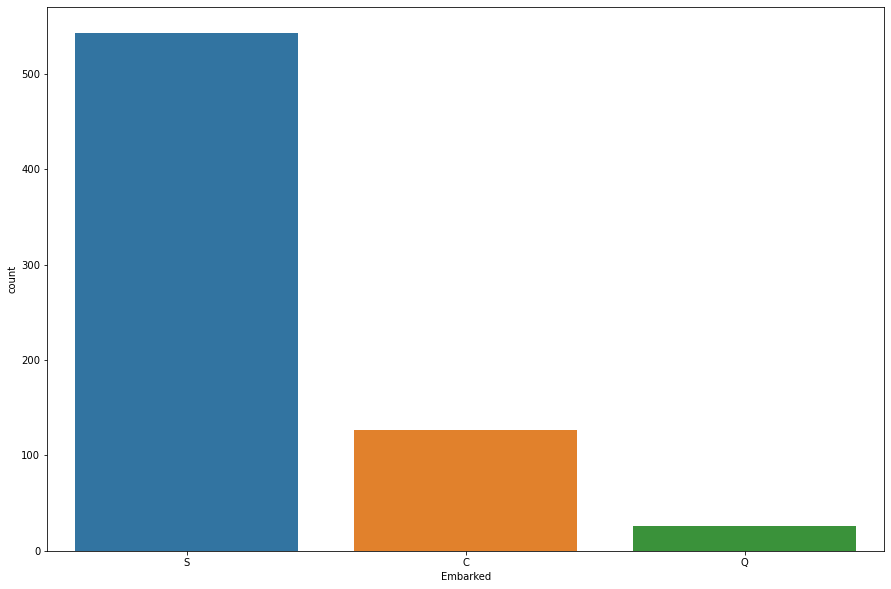

In [90]:
plt.figure(figsize=(15,10))

sns.countplot(x=df['Embarked'])

In [91]:
pclass_name=df['Embarked'].value_counts().index

In [92]:
pclass_value=df['Embarked'].value_counts().values

In [93]:
exp=[0,0,0.5]

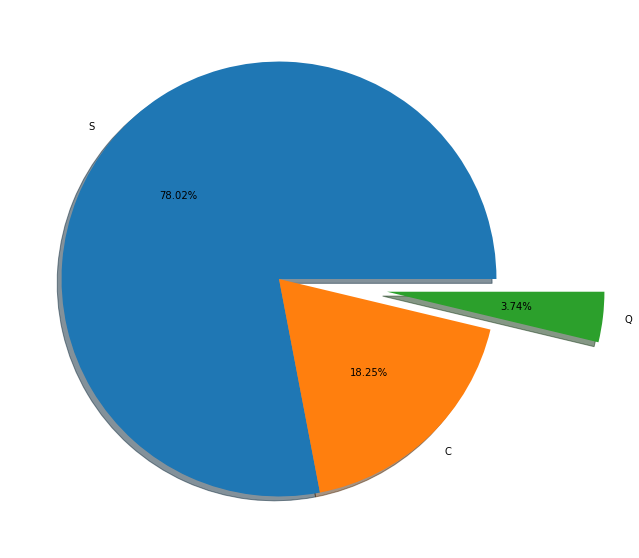

In [94]:
plt.figure(figsize=(15,10))
plt.pie(x=pclass_value,labels=pclass_name,explode=exp,shadow=1,autopct='%1.2f%%')
plt.show()

# Observations: 
1. From Southampton more number of passengers had depoted 
2. From Queenstown very few number of passengers had depoted 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

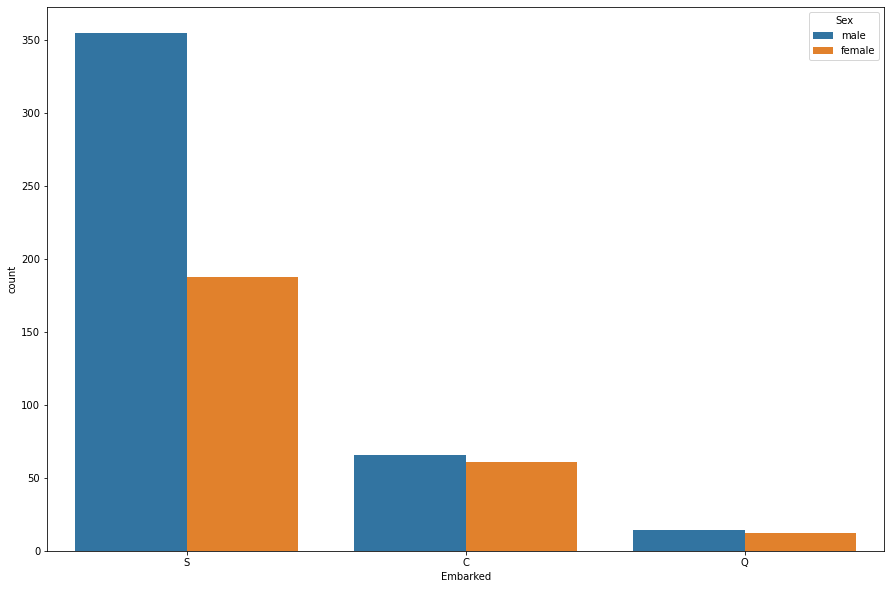

In [95]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Embarked'],hue=df['Sex'])

In [96]:
pd.crosstab(index=df['Embarked'],columns=df['Sex'],margins=True)

Sex,female,male,All
Embarked,,,
C,61,66,127
Q,12,14,26
S,188,355,543
All,261,435,696


# Observations
1. 543 passengers embarked from Southampton which is maximum 
2. 127 passengers embarked from Cherbourg.
3. 26 passengers embarked from Queenstown which is minimum 


In [97]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


In [98]:
sex_df=df.groupby('Sex')


In [99]:
sex_df['Embarked'].value_counts()

Sex     Embarked
female  S           188
        C            61
        Q            12
male    S           355
        C            66
        Q            14
Name: Embarked, dtype: int64

# Observations
1. From Southampton more number of males and females have depoted comapre to other Embarked 

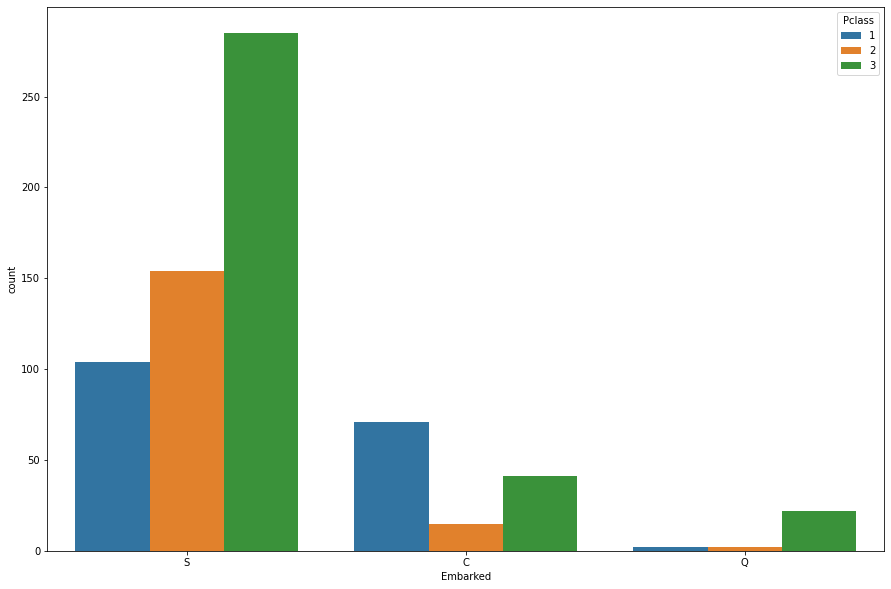

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Embarked'],hue=df['Pclass'])
plt.show()

In [101]:
pd.crosstab(index=df['Embarked'],columns=df['Pclass'],margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,71,15,41,127
Q,2,2,22,26
S,104,154,285,543
All,177,171,348,696


# Observations
1. 543 passengers embarked from Southampton which is maximum 
2. 127 passengers embarked from Cherbourg.
3. 26 passengers embarked from Queenstown which is minimum 


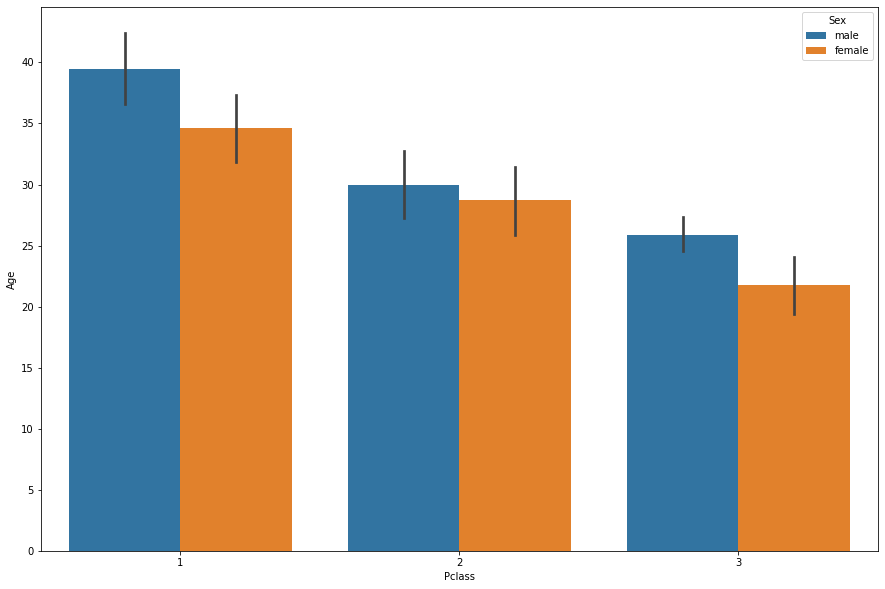

In [102]:
plt.figure(figsize=(15,10))
sns.barplot(x='Pclass',y='Age',hue='Sex',data=df)
plt.show()

In [103]:
df.pivot_table(values=['Age'],index=['Pclass'],columns=['Sex'],aggfunc=np.mean)

Age           
Sex        female       male
Pclass                      
1       34.611765  39.461087
2       28.722973  29.972474
3       21.750000  25.885854

# Observations
1. Avg age of male and female passengers from pclass 1 is maximum 
2. Avg age of male and female passengers from pclass 3 is minimum

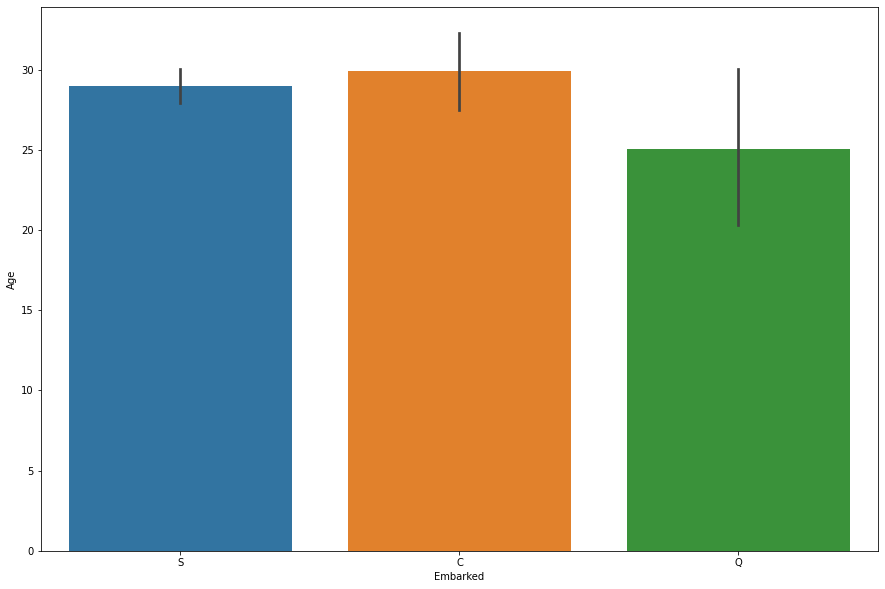

In [104]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Embarked'],y=df['Age'])
plt.show()

In [105]:
df.pivot_table(values=['Age'],index=['Embarked'],aggfunc=np.mean)

,Age
Embarked,
C,29.912756
Q,25.038462
S,28.990331


# Observations
1. Avg age of passengers who bord from Cherbourg is maximum.
2. Avg age of passengers who bord from Queenstown is minimum.

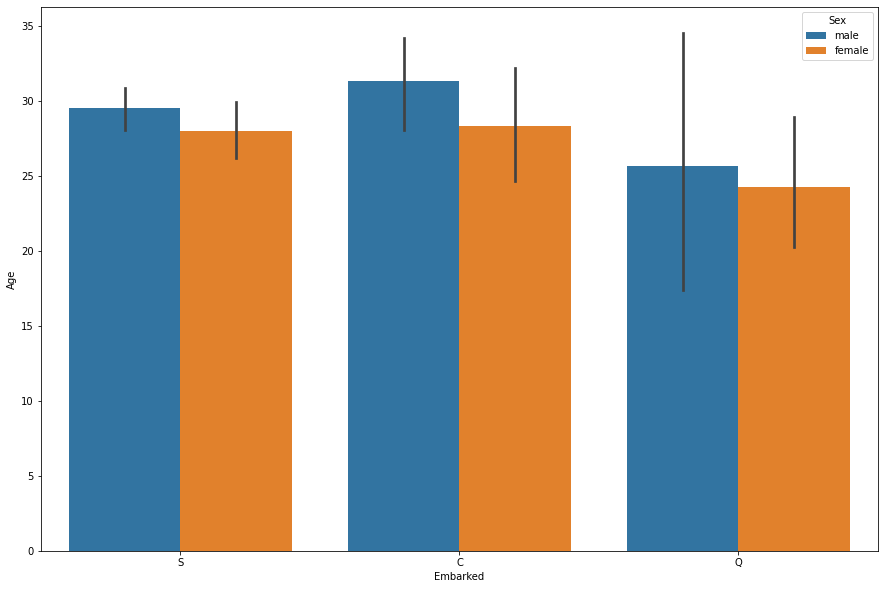

In [106]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Embarked'],y=df['Age'],hue=df['Sex'])
plt.show()

In [107]:
df.pivot_table(values=['Age'],index=['Embarked'],columns='Sex',aggfunc=np.mean)

Age           
Sex          female       male
Embarked                      
C         28.344262  31.362424
Q         24.291667  25.678571
S         28.007979  29.510563

# Observations
1. Avg age of male passengers is 31.36 years and female passengers is 28.34 years who bord from Cherbourg which is maximum.
2. Avg age of male passengers is 24.29 years and female passengers is 25.67 years passengers who bord from Queenstown which is minimum.

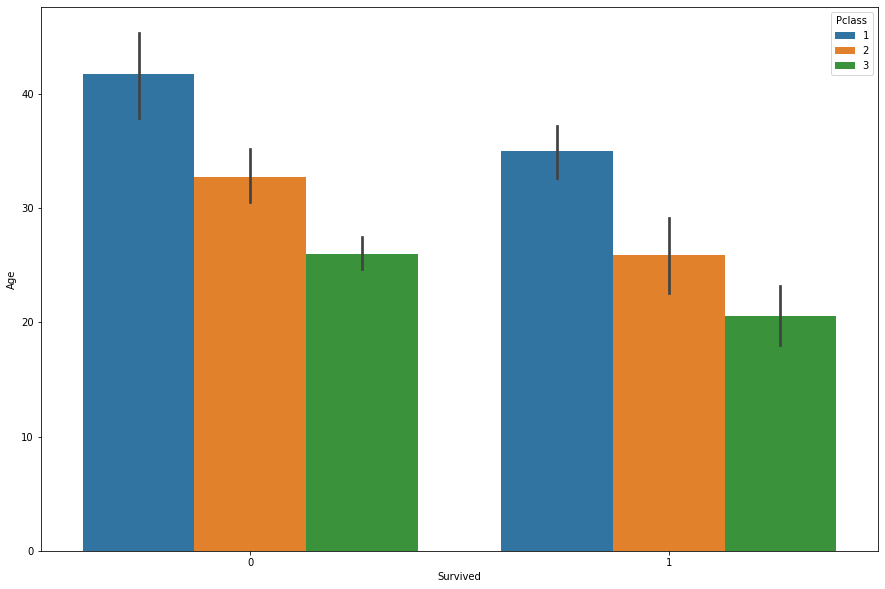

In [108]:
plt.figure(figsize=(15,10))
sns.barplot(x='Survived',y='Age',hue='Pclass',data=df)
plt.show()

In [109]:
df.pivot_table(values=['Age'],index=['Survived'],columns='Pclass',aggfunc=np.mean)

Age                      
Pclass            1          2          3
Survived                                 
0         41.741071  32.761364  25.971591
1         34.999339  25.901566  20.594286

# Observations
1. Avg age of Pclass 1 passengers who survived is 34.99 years 
2. Avg age of Pclass 2 passengers who survived is 25.90 years
3. Avg age of Pclass 3 passengers who survived is 20.59 years
4. Avg age of Pclass 1 passengers who did not survived is 41.74 years 
5. Avg age of Pclass 2 passengers who did not survived is 32.76 years
6. Avg age of Pclass 3 passengers who did not survived is 25.97 years


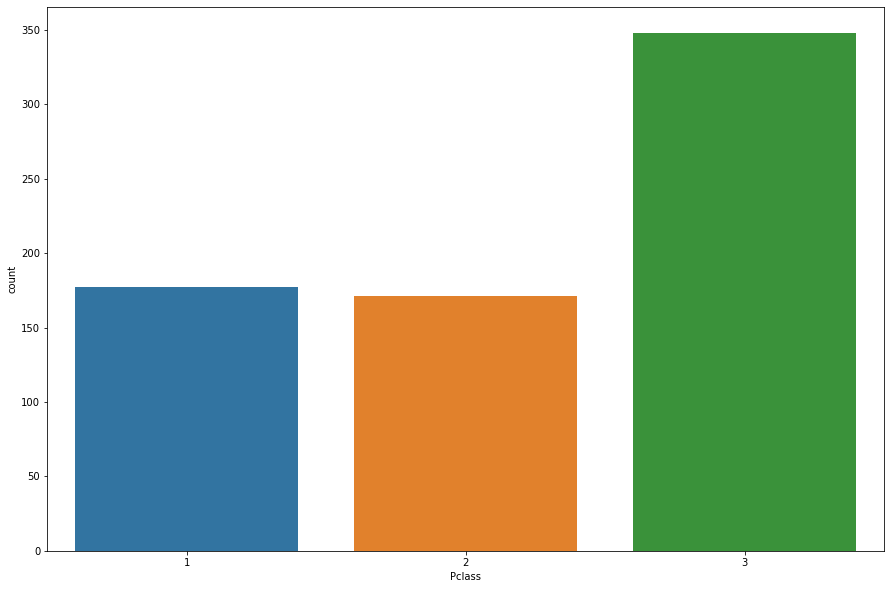

In [110]:
plt.figure(figsize=(15,10))
sns.countplot(x='Pclass',data=df)
plt.show()

In [111]:
pd.crosstab(index=df['Pclass'],columns=df['Age'],margins=True)

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,All
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,4,0,5,0,3,2,3,1,2,177
2,0,1,0,2,0,2,2,3,2,1,...,0,2,0,1,1,0,1,0,0,171
3,1,0,2,0,0,5,7,3,7,3,...,0,0,0,1,0,1,0,1,0,348
All,1,1,2,2,1,7,10,6,10,4,...,4,2,5,2,4,3,4,2,2,696


# Observations
1. Total number of passengers of Pclass 1 is 177 
2. Total number of passengers of Pclass 2 is 171
3. Total number of passengers of Pclass 3 is 348
4. Total number of passengers : 696


<Figure size 1080x504 with 0 Axes>

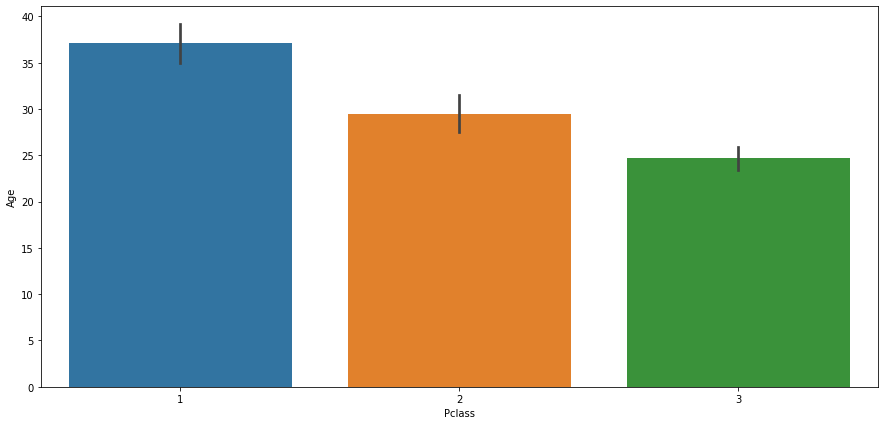

<Figure size 1080x504 with 0 Axes>

In [112]:
plt.figure(figsize=(15,7))
sns.barplot(x='Pclass',y='Age',data=df) #mean of age for each class is shown
plt.figure(figsize=(15,7))

In [113]:
df.pivot_table(values=['Age'],index=['Pclass'],aggfunc=np.mean)

,Age
Pclass,
1,37.132316
2,29.431754
3,24.673621


# Observations
1. Avg age of Pclass 1 passenger is 37 years
2. Avg age of Pclass 2 passenger is 29.4 years
3. Avg age of Pclass 3 passenger is 24.6 years

In [114]:
pclass_name=df['Pclass'].value_counts().index

In [115]:
pclass_value=df['Pclass'].value_counts().values

In [116]:
exp=[0.5,0,0]

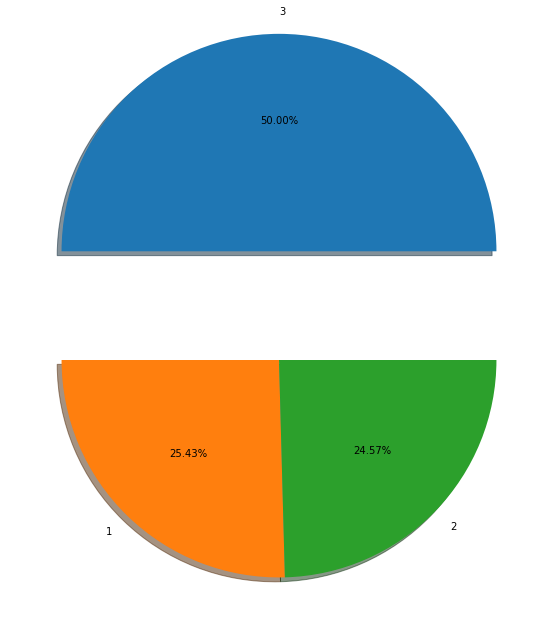

In [117]:
plt.figure(figsize=(15,10))

plt.pie(x=pclass_value,explode=exp,labels=pclass_name,shadow=1,autopct='%1.2f%%')
plt.show()

# Observations
## From the above count plot it is clear that 
1. Passangers travelling in Pclass 3 is maximum as compare to Pclass 1 and Pclass 2

<Figure size 1080x504 with 0 Axes>

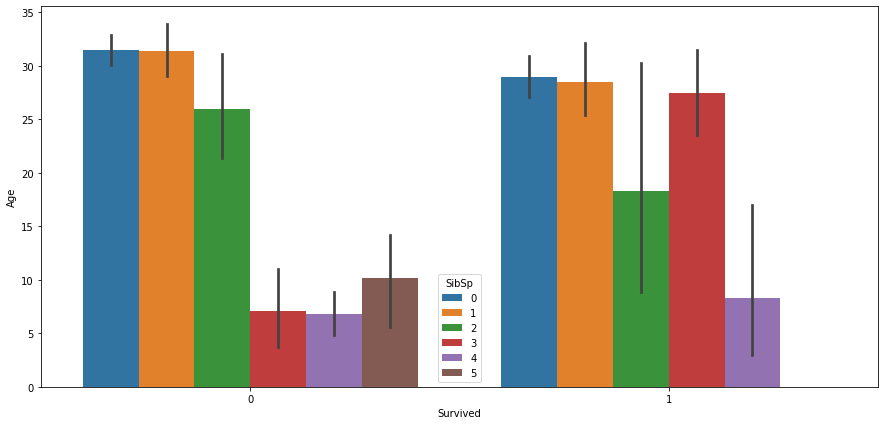

<Figure size 1080x504 with 0 Axes>

In [118]:
plt.figure(figsize=(15,7))
sns.barplot(x='Survived',y='Age',hue='SibSp',data=df)
plt.figure(figsize=(15,7))

In [119]:
df.pivot_table(values=['Age'],index=['Survived'],columns=['SibSp'],aggfunc=np.mean)

Age                                              
SibSp             0          1          2       3         4     5
Survived                                                         
0         31.437722  31.400000  26.000000   7.125  6.800000  10.2
1         28.963873  28.530103  18.318182  27.500  8.333333   NaN

# Observations
1. Avg age of passengers with no SibSp and who did not survived is 31.43 years
2. Avg age of passengers with 1 SibSp and who did not survived is 31.40 years
3. Avg age of passengers with 2 SibSp and who did not survived is 26 years
4. Avg age of passengers with 3 SibSp and who did not survived is 7.12 years
5. Avg age of passengers with 4 SibSp and who did not survived is 6.80 years
6. Avg age of passengers with 5 SibSp and who did not survived is 10.2 years

1. Avg age of passengers with no SibSp and who survived is 28.96 years
2. Avg age of passengers with 1 SibSp and who survived is 28.53 years
3. Avg age of passengers with 2 SibSp and who survived is 18.31 years
4. Avg age of passengers with 3 SibSp and who survived is 27.50 years
5. Avg age of passengers with 4 SibSp and who survived is 8.33 years
6. Avg age of passengers with 5 SibSp and who survived is NAN 




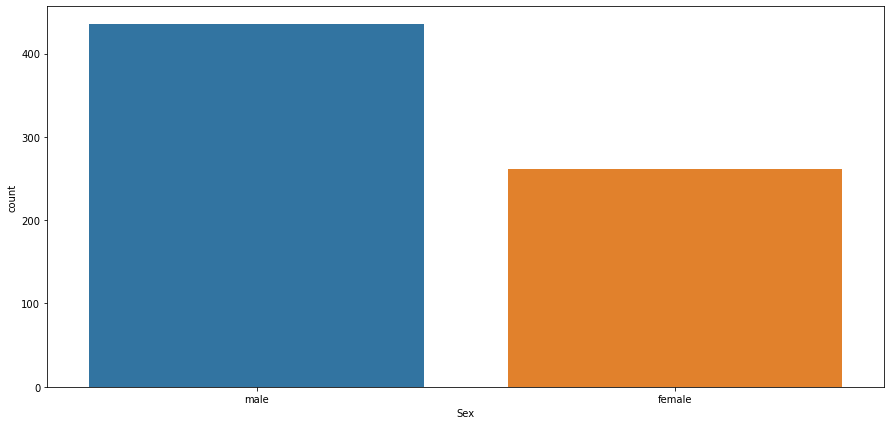

In [120]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',data=df)
plt.show()

In [121]:
gender_name=df.Sex.value_counts().index


In [122]:
gender_value=df.Sex.value_counts().values

In [123]:
exp=[0,0.7]

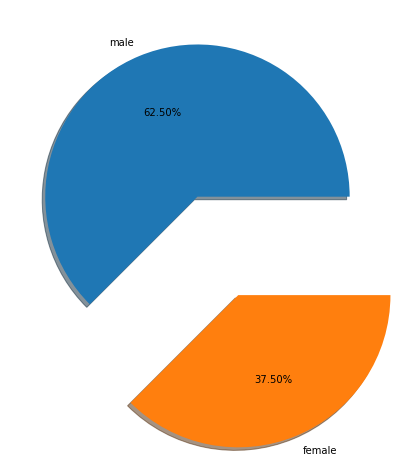

In [124]:
plt.figure(figsize=(15,7))
plt.pie(x=gender_value,explode=exp,shadow=True,labels=gender_name,autopct='%1.2f%%')
plt.show()

# Observations
1. Male passengers are more in comparision to female passengers

In [125]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,3,male,22.0,1,0,S,1.981001
1,1,1,female,38.0,1,0,C,4.266662
2,1,3,female,26.0,0,0,S,2.070022
3,1,1,female,35.0,1,0,S,3.972177
4,0,3,male,35.0,0,0,S,2.085672
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597
886,0,2,male,27.0,0,0,S,2.564949
887,1,1,female,19.0,0,0,S,3.401197
889,1,1,male,26.0,0,0,C,3.401197


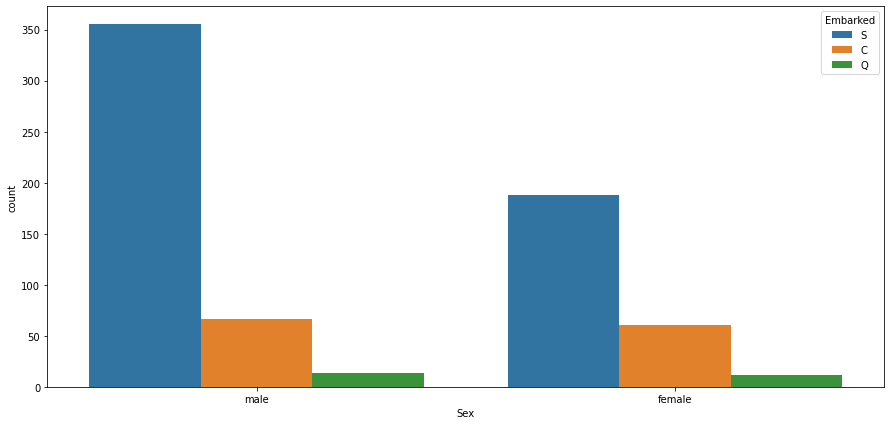

In [126]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Embarked',data=df)
plt.show()

In [127]:
pd.crosstab(df.Sex,df.Embarked,margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,61,12,188,261
male,66,14,355,435
All,127,26,543,696


# Observations
1. 543 passengers bord from Southampton which is highest 
2. 127 passengers bord from Cherbourg
3. 26 passengers bord from Queenstown which is lowest 

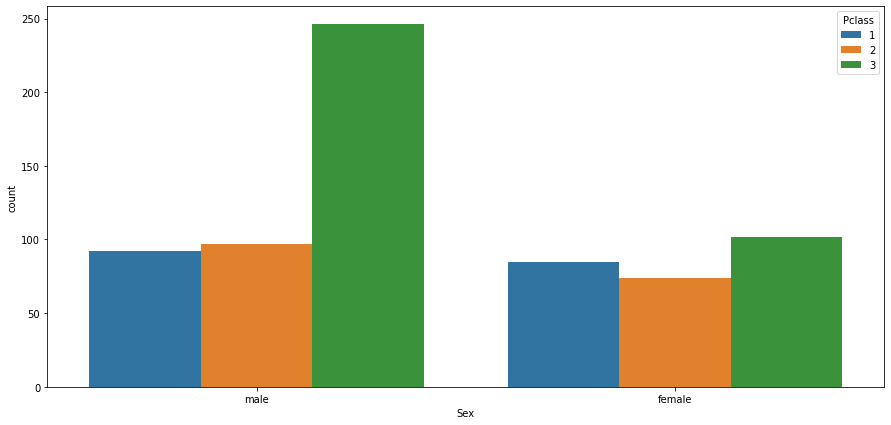

In [128]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Pclass',data=df)
plt.show()

In [129]:
pd.crosstab(index=df['Sex'],columns=df['Pclass'],margins=True)

Pclass,1,2,3,All
Sex,,,,
female,85,74,102,261
male,92,97,246,435
All,177,171,348,696


# Observations
1. In Pclass 1, total 177 number of passengers in which 85 female and 92 male passengers   
2. In Pclass 2, total 171 number of passengers in which 74 female and 97 male passengers.
3. In Pclass 3, total 348 number of passengers in which 102 female and 246 male passengers.
4. Maximum number of passengers travelling in Pclass 3
5. Minimum number of passengers travelling in Pclass 2
6. Male passengers are travelling more than female passengers.


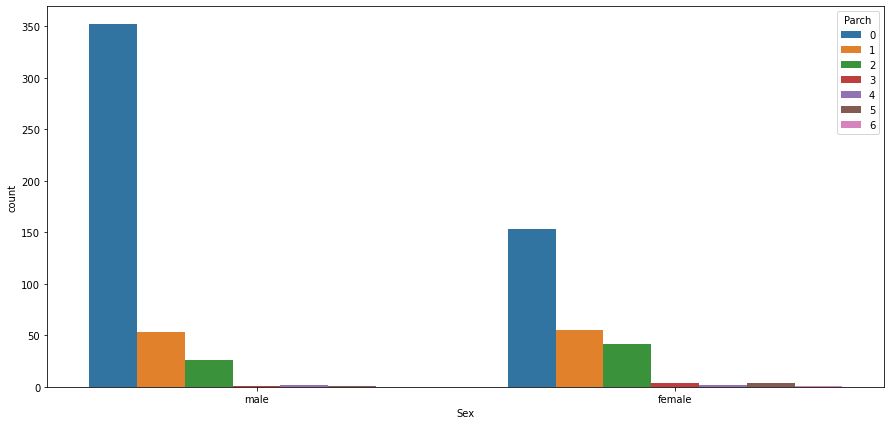

In [130]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Parch',data=df)
plt.show()

In [131]:
pd.crosstab(df.Sex,df.Parch,margins=True)

Parch,0,1,2,3,4,5,6,All
Sex,,,,,,,,
female,153,55,42,4,2,4,1,261
male,352,53,26,1,2,1,0,435
All,505,108,68,5,4,5,1,696


# Observations
1. Total number of males and females travelling without parent and child are 505 which is maximum.   
2. Total number of females travelling with 1 parent and 6 childrens are 1 which is minimum.
3. Total number of passengers travelling are 696.

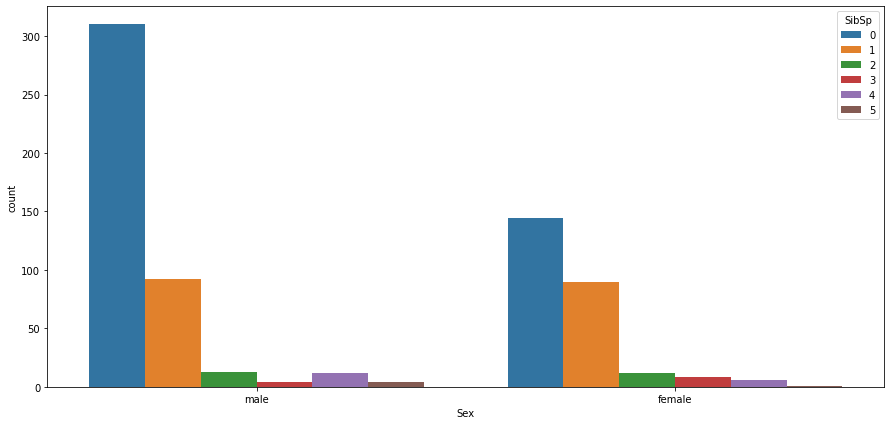

In [132]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='SibSp',data=df)
plt.show()

In [133]:
pd.crosstab(index=df['Sex'],columns=df['SibSp'],margins=True)

SibSp,0,1,2,3,4,5,All
Sex,,,,,,,
female,144,90,12,8,6,1,261
male,310,92,13,4,12,4,435
All,454,182,25,12,18,5,696


# Observations
1. Total Number of males and females passengers travelling without Spouse and sibling are 454 which is maximum   
2. Female passenger travelling with 5 SibSp(1 Spouse and 4 siblings) is only 1.
3. Total male passengers travelling : 435
4. Total female passengers travelling : 261
5. Total passengers travelling : 696

# Family Size can be calculated by adding total siblings ,spouse,parent and childrens

In [134]:
df['Family_Size']=df['SibSp']+df['Parch']

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\2978438924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_Size']=df['SibSp']+df['Parch']


In [135]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Family_Size
0,0,3,male,22.0,1,0,S,1.981001,1
1,1,1,female,38.0,1,0,C,4.266662,1
2,1,3,female,26.0,0,0,S,2.070022,0
3,1,1,female,35.0,1,0,S,3.972177,1
4,0,3,male,35.0,0,0,S,2.085672,0
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,3.371597,5
886,0,2,male,27.0,0,0,S,2.564949,0
887,1,1,female,19.0,0,0,S,3.401197,0
889,1,1,male,26.0,0,0,C,3.401197,0


In [136]:
def FindAlone(value):
    if value==0:
        return 1
    else:
        return 0

In [137]:
df['Alone']=df['Family_Size'].apply(FindAlone)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\3719507943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone']=df['Family_Size'].apply(FindAlone)


In [138]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare_log,Family_Size,Alone
Survived,1.000000,-0.377366,-0.051054,-0.025004,0.089421,0.347419,0.035814,-0.191190
Pclass,-0.377366,1.000000,-0.369850,0.064993,0.025691,-0.767120,0.055567,0.151654
Age,-0.051054,-0.369850,1.000000,-0.307563,-0.186659,0.143782,-0.300441,0.185705
SibSp,-0.025004,0.064993,-0.307563,1.000000,0.380297,0.302084,0.846338,-0.627914
Parch,0.089421,0.025691,-0.186659,0.380297,1.000000,0.325509,0.814484,-0.573400
Fare_log,0.347419,-0.767120,0.143782,0.302084,0.325509,1.000000,0.376969,-0.473143
Family_Size,0.035814,0.055567,-0.300441,0.846338,0.814484,0.376969,1.000000,-0.724134
Alone,-0.191190,0.151654,0.185705,-0.627914,-0.573400,-0.473143,-0.724134,1.000000


# Feature Selection Step

# Observations
1. Family_Size and Parch have positive corelation and Family_Size and SibSp also have positive corelation so we can drop Parch and SibSp 

In [139]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\2549777548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Parch','SibSp'],axis=1,inplace=True)


In [140]:
df

,Survived,Pclass,Sex,Age,Embarked,Fare_log,Family_Size,Alone
0,0,3,male,22.0,S,1.981001,1,0
1,1,1,female,38.0,C,4.266662,1,0
2,1,3,female,26.0,S,2.070022,0,1
3,1,1,female,35.0,S,3.972177,1,0
4,0,3,male,35.0,S,2.085672,0,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,Q,3.371597,5,0
886,0,2,male,27.0,S,2.564949,0,1
887,1,1,female,19.0,S,3.401197,0,1
889,1,1,male,26.0,C,3.401197,0,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


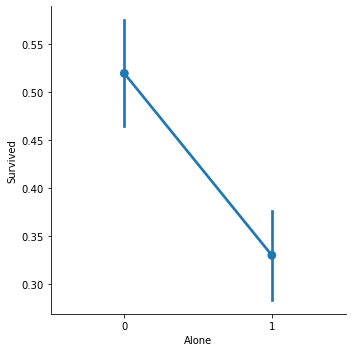

In [141]:
sns.factorplot(x='Alone',y='Survived',data=df)

# Observations
1. If a passenger is alone, the survival rate is less.
2. If a passenger is not alone, the survival rate is more.


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


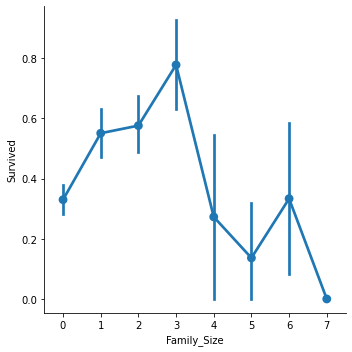

In [142]:
sns.factorplot(x='Family_Size',y='Survived',data=df)

# Observations
1. If the family size is equal to or greater than 4, chances of survival decrease considerably.
2. If the family size is 3 ,chances of survived is high


In [143]:
X=df.drop('Survived',axis=1) #y is independent variable 

In [144]:
df

,Survived,Pclass,Sex,Age,Embarked,Fare_log,Family_Size,Alone
0,0,3,male,22.0,S,1.981001,1,0
1,1,1,female,38.0,C,4.266662,1,0
2,1,3,female,26.0,S,2.070022,0,1
3,1,1,female,35.0,S,3.972177,1,0
4,0,3,male,35.0,S,2.085672,0,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,Q,3.371597,5,0
886,0,2,male,27.0,S,2.564949,0,1
887,1,1,female,19.0,S,3.401197,0,1
889,1,1,male,26.0,C,3.401197,0,1


In [145]:
le=LabelEncoder()


In [146]:
df['Sex_New']=le.fit_transform(df['Sex'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\3845497361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex_New']=le.fit_transform(df['Sex'])


In [147]:
df

,Survived,Pclass,Sex,Age,Embarked,Fare_log,Family_Size,Alone,Sex_New
0,0,3,male,22.0,S,1.981001,1,0,1
1,1,1,female,38.0,C,4.266662,1,0,0
2,1,3,female,26.0,S,2.070022,0,1,0
3,1,1,female,35.0,S,3.972177,1,0,0
4,0,3,male,35.0,S,2.085672,0,1,1
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,Q,3.371597,5,0,0
886,0,2,male,27.0,S,2.564949,0,1,1
887,1,1,female,19.0,S,3.401197,0,1,0
889,1,1,male,26.0,C,3.401197,0,1,1


In [148]:
df['Embarked_New']=le.fit_transform(df['Embarked'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\243034309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked_New']=le.fit_transform(df['Embarked'])


In [149]:
df

,Survived,Pclass,Sex,Age,Embarked,Fare_log,Family_Size,Alone,Sex_New,Embarked_New
0,0,3,male,22.0,S,1.981001,1,0,1,2
1,1,1,female,38.0,C,4.266662,1,0,0,0
2,1,3,female,26.0,S,2.070022,0,1,0,2
3,1,1,female,35.0,S,3.972177,1,0,0,2
4,0,3,male,35.0,S,2.085672,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,Q,3.371597,5,0,0,1
886,0,2,male,27.0,S,2.564949,0,1,1,2
887,1,1,female,19.0,S,3.401197,0,1,0,2
889,1,1,male,26.0,C,3.401197,0,1,1,0


In [150]:
df.drop(['Sex','Embarked'],axis=1,inplace=True) #drop the sex and Embarked feature 

C:\Users\himanshu\AppData\Local\Temp\ipykernel_12432\1516339020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Sex','Embarked'],axis=1,inplace=True) #drop the sex and Embarked feature


In [151]:
df

,Survived,Pclass,Age,Fare_log,Family_Size,Alone,Sex_New,Embarked_New
0,0,3,22.0,1.981001,1,0,1,2
1,1,1,38.0,4.266662,1,0,0,0
2,1,3,26.0,2.070022,0,1,0,2
3,1,1,35.0,3.972177,1,0,0,2
4,0,3,35.0,2.085672,0,1,1,2
...,...,...,...,...,...,...,...,...
885,0,3,39.0,3.371597,5,0,0,1
886,0,2,27.0,2.564949,0,1,1,2
887,1,1,19.0,3.401197,0,1,0,2
889,1,1,26.0,3.401197,0,1,1,0


In [152]:
y=df['Survived']

In [153]:
X=df.drop('Survived',axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [155]:
X

,Pclass,Age,Fare_log,Family_Size,Alone,Sex_New,Embarked_New
0,3,22.0,1.981001,1,0,1,2
1,1,38.0,4.266662,1,0,0,0
2,3,26.0,2.070022,0,1,0,2
3,1,35.0,3.972177,1,0,0,2
4,3,35.0,2.085672,0,1,1,2
...,...,...,...,...,...,...,...
885,3,39.0,3.371597,5,0,0,1
886,2,27.0,2.564949,0,1,1,2
887,1,19.0,3.401197,0,1,0,2
889,1,26.0,3.401197,0,1,1,0


In [156]:
X_train.shape

(556, 7)

In [157]:
y_train.shape

(556,)

In [158]:
X_test.shape

(140, 7)

In [159]:
y_test.shape

(140,)

In [160]:
model=LogisticRegression()

In [161]:
#training the logistic Regression model to train the model

In [162]:
model.fit(X_train,y_train) #fit method is used to train the machine learning model 

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
prediction=model.predict(X_test) # predict the labels of the data values on the basis of the trained model.

In [164]:
prediction

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [165]:
model.predict_proba(X_test)

array([[0.11537164, 0.88462836],
       [0.89582316, 0.10417684],
       [0.36624405, 0.63375595],
       [0.07782703, 0.92217297],
       [0.90412824, 0.09587176],
       [0.08256867, 0.91743133],
       [0.94297357, 0.05702643],
       [0.87986127, 0.12013873],
       [0.63292073, 0.36707927],
       [0.86959361, 0.13040639],
       [0.31600671, 0.68399329],
       [0.88257027, 0.11742973],
       [0.86983478, 0.13016522],
       [0.93926948, 0.06073052],
       [0.11140841, 0.88859159],
       [0.88956036, 0.11043964],
       [0.86265231, 0.13734769],
       [0.16791628, 0.83208372],
       [0.8768099 , 0.1231901 ],
       [0.64229575, 0.35770425],
       [0.28118479, 0.71881521],
       [0.81243052, 0.18756948],
       [0.78621186, 0.21378814],
       [0.26729057, 0.73270943],
       [0.08345854, 0.91654146],
       [0.87018053, 0.12981947],
       [0.40848403, 0.59151597],
       [0.80694877, 0.19305123],
       [0.07014062, 0.92985938],
       [0.82155059, 0.17844941],
       [0.

In [166]:
res=pd.DataFrame({"Actual":y_test,"Prediction":prediction})

In [167]:
res

,Actual,Prediction
866,1,1
401,0,0
786,1,1
556,1,1
713,0,0
...,...,...
30,0,1
205,0,1
501,0,1
625,0,0


In [168]:
final_df=pd.concat((df,res),axis=1)

In [169]:
final_df=final_df[final_df['Actual']>0]

In [170]:
accuracy_score(final_df['Actual'],final_df['Prediction'])

0.8

# Observations:
1. Our Model can accurately predict 80 times correct out of 100
2. Model accuracy is 80%

In [171]:
confusion_matrix(final_df['Actual'],final_df['Prediction'])

array([[ 0,  0],
       [11, 44]], dtype=int64)

In [172]:
rfc=RandomForestClassifier()

In [173]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
y_pred=rfc.predict(X_test)


In [177]:
accuracy_score(y_test,y_pred)

0.7642857142857142

# Observations:
1. Our Model can accurately predict 76 times correct out of 100
2. Model accuracy is 76.42%

In [179]:
knc=KNeighborsClassifier()


In [180]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [182]:
y_pred=knc.predict(X_test)

In [183]:
accuracy_score(y_test,y_pred)

0.7071428571428572

# Observations:
1. Our Model can accurately predict 70 times correct out of 100
2. Model accuracy is 70.71%